In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)

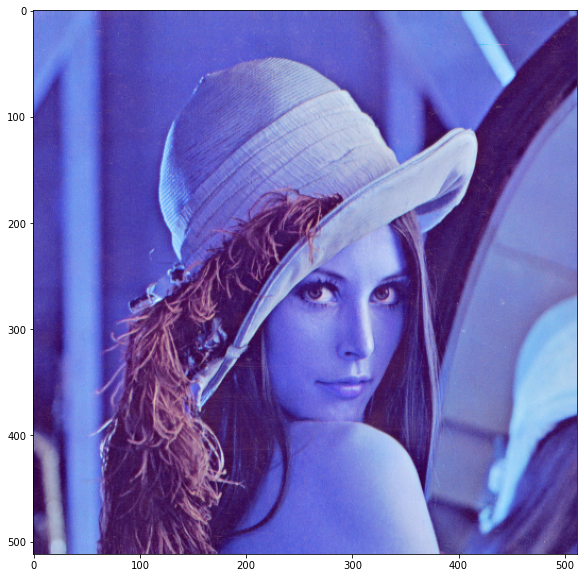

In [16]:
img = cv2.imread('opencv/lena.png')
plt.imshow(img)
plt.show()

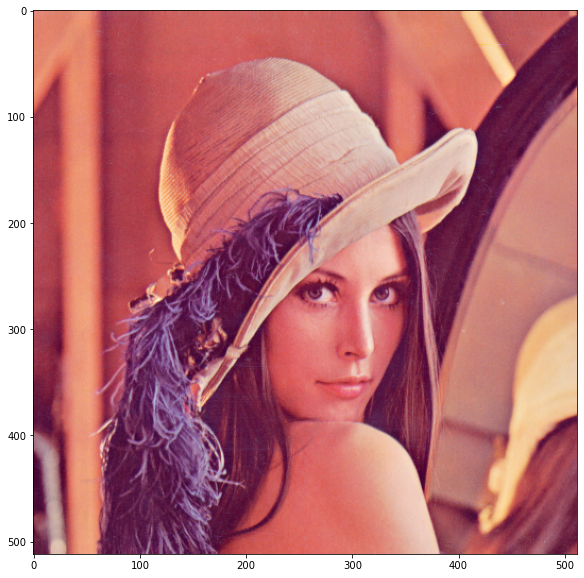

In [17]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

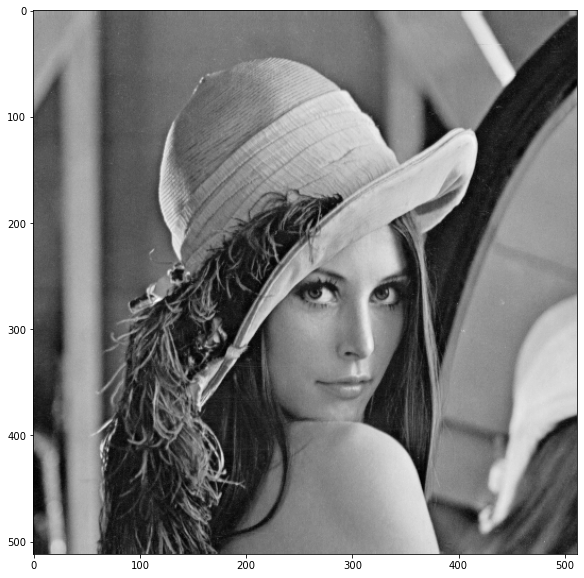

In [18]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

In [23]:
from scipy.signal import convolve2d
import numpy as np

# https://en.wikipedia.org/wiki/Gabor_filter
def gabor(size, sigma, theta, lam, gamma, psi = np.pi / 2):
    sigma_x = sigma
    sigma_y = float(sigma) / gamma

    (y, x) = np.meshgrid(np.arange(-size, size + 1), np.arange(-size, size + 1))

    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / lam * x_theta + psi)
    return gb


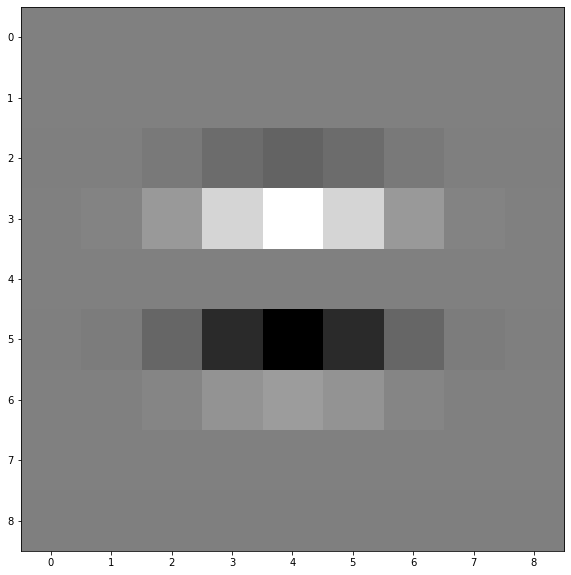

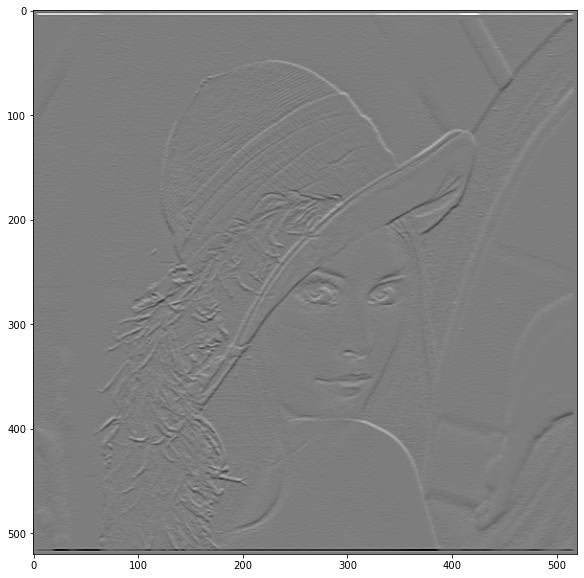

In [24]:
gabor_filter = gabor(4, 1, 0, 0.3, 0.9)
plt.imshow(gabor_filter*128 + 128, cmap='gray')
plt.show()
img_gabor = convolve2d(img_gray, gabor_filter)
plt.imshow(img_gabor, cmap='gray')
plt.show()

In [25]:
def my_convolve2d(data, filt):
    filt_h, filt_w = filt.shape
    data_h, data_w = data.shape
    res = np.zeros((data_h - filt_h, data_w - filt_w))
    for y in range(res.shape[0]):
        for x in range(res.shape[1]):
            res[y][x] = np.sum(data[y:y+filt_h, x:x+filt_w] * filt) / (filt_h * filt_w)
    return res

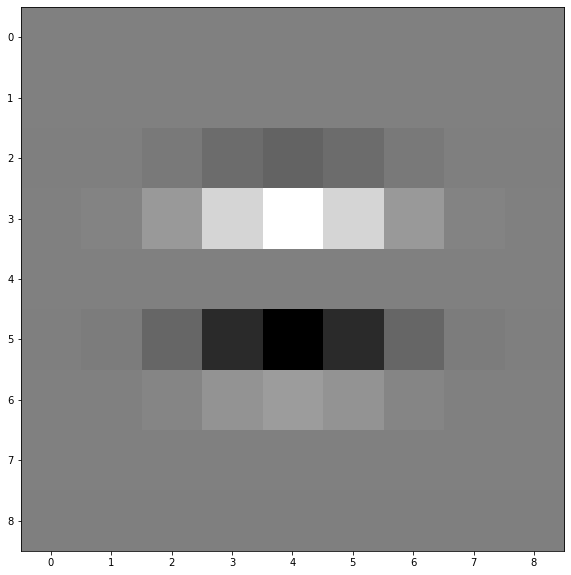

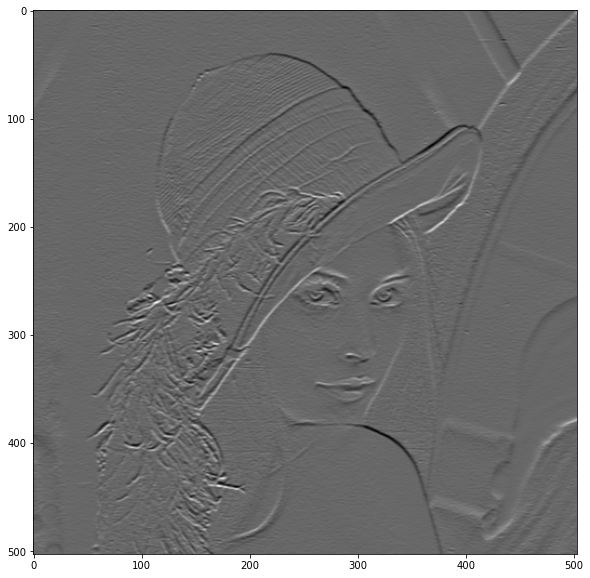

In [26]:
gabor_filter = gabor(4, 1, 0, 0.3, 0.9)
plt.imshow(gabor_filter*128 + 128, cmap='gray')
plt.show()
img_gabor = my_convolve2d(img_gray, gabor_filter)
plt.imshow(img_gabor, cmap='gray')
plt.show()